# Mental Health Care Usage for Children

Harold Cha <br>
DIGHUM101: Practicing the Digital Humanities <br>
Created July 1st, 2020
****
![therapy](../images/therapy.jpg)

## Introduction

  Depression and other forms of mental health disorders have infamously become more apparent over time, especially within the young, adolescent generation. This could be due to immense stress from numerous sources, overstimulation from social media, or lack of sleep from work, to name a few.
   
   Being at a critical period in life where physical and mental growth takes its stride but is also extremely delicate, having such psychological factors could be detrimental to one’s development. I was left wondering whether or not any action have been or are being taken in response to this growing concern, and what factors may affect a child's need to reach out for help.
   
   As someone who takes therapy and has first-hand experience with its benefits, not only is this project an important topic to explore, but also a personal interest. Every time I finish each session feeling better & stronger and reflect back on the personal developments that I notice, I always wish that I sought for therapy sooner. Knowing its huge benefits and support (granted, in ideal situations, eg. when one’s therapist works well & has good chemistry with their patient, when the patient is willing to work with their therapist, and when there are little to no complications with having therapy like financial reasons, etc.), I couldn’t emphasize taking therapy more than it deserves.

## Research Question


**• How has mental health care usage by children change over time?** <br>
**• What factors have had an effect in one's child's ability to reach out (or not reach out) for therapy?**

### Why bother with this research?

 Throughout my search for online data, I was not able to stumble upon any research or references illustrating the use of mental health care over time. There are studies exploring the benefits of mental health care and growing trends with mental health disorders amongst adolescents, but none that focus on the growth or depletion of service over time. There are databases and a few published papers presenting the percent usage of mental health care by children, but only limited within a year or two. From this, I expected to find some paper looking at the same topic but over a longer time set, yet I failed to encounter any. Let alone, even simple Google searches such as “Have more kids been receiving therapy?” or “Percentage of children receiving therapy over time” yield no fruitful results other than clusters of web pages providing advice to parents seeking psychotherapy for their children or limited statistical runs from one year.
 
 In contrast to the other papers with the same topic, I instead will be looking at a longer course of time, as well as identifying interesting correlations and factors associated with reachout for mental health care.

### Data Sources

The data for this project were extracted from the **National Health Institute Survey (NHIS)** database from the *Center for Disease Control and Prevention* website. (https://www.cdc.gov/nchs/nhis/data-questionnaires-documentation.htm), looking at the years from **2000 - 2018** based from the sample of children. \
*(Note: As much as I wished to look into 2019 and 2020, no data was available at the time of developing this notebook.)*

As seen and explored later, each year's dataset has a large set of columns, representing a question from that year's survey. Some years may have unique questions not found on other years due to changes/updates in health protocols, or based on the years' national health priority concern. For example, the survey for 2020 may have questions regarding COVID-19, which would not be found in other years.

## Methods

In this project, I will be looking at column variables/questions found universally in all 18 years. Although some years may contain interesting questions that deserve further investigation, it would be best to preserve a sustained perspective of change throughout all years in respect to the research question. We will be focusing most of our data analysis with the following column variable/question:

**CHCSYR1 -  "During the past 12 months, has your child seen or talked to a mental health professional?"**

This question is the most appropriate in regards to gauging the usage of mental health care for each year compared to the others. In relation to this question, I scanned through each year's Variable Summaries (found under *Data/sample_child_survey/summary*) and chose the following questions that I consider potentially direct/important factors affecting a child's reachout for help:

**• SEX -  "Is your child male or female?"**  <br>
**• RACERPI2 -  "OMB Race Group"**  <br>
(Note: the question above does not include Hispanic or Latino as it's covered in another column asking for specific subgroup of Hispanic origin (HISPAN_I); due to the chance that some respondents are mixed, the HISPAN_I value will be converted to a boolean series, which will be performed during data cleaning)  <br>
**• AGE_P -  "How old is your child?"**  <br>
**• CHCAFYR2 -  "During the past 12 months, was there any time when your child needed mental health care but didn't get it because you couldn't afford it?"**  <br>
**• CMDLONGR -  "About how long has it been since anyone in the family last saw or talked to a doctor or health care professional about your child's health?"**

(Note: There is an exception for the year 2004. For reasons that I myself do not know, numerous useful questions that are found in all other years have been excluded in 2004. There will be some datapoints in which 2004 will not be represented, however will be visible in others, such as **SEX** and **CHCSYR1**)

### Installing/Importing Tools

First, before we dive in, let's install and import all our necessary libraries and packages for our notebook. If it's your first time using jupyter notebook or don't recognize any of the listed libraries in the first four lines of the following cell, delete the hash/octothorpe. Otherwise, run the following cell.

In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Changing Directory

To access our datasets (which should be pulled from Github and found under the Data file), let's change our directory.

In [ ]:
pwd # our current directory

In [3]:
os.chdir("../Data/sample_child_survey/csv") # changing our directory to our folder with datasets

In [4]:
ls # listing all the files found in our current directory (should be a list of .csv files with 'samchild')

samchild_2000.csv  samchild_2005.csv  samchild_2010.csv  samchild_2015.csv*
samchild_2001.csv  samchild_2006.csv  samchild_2011.csv  samchild_2016.csv*
samchild_2002.csv  samchild_2007.csv  samchild_2012.csv  samchild_2017.csv*
samchild_2003.csv  samchild_2008.csv  samchild_2013.csv  samchild_2018.csv*
samchild_2004.csv  samchild_2009.csv  samchild_2014.csv


### Reading/Cleaning our Data

Now that we're on the right directory, let's read and clean the data files that we have. The cleaning procedure is described in the code's comments. On the side, we'll also be coding up a small summary dataframe listing the total responses per year after the cleaning, as well as the number of "*Yes*" and "*No*"'s to **CHCSYR1**. Afterwards, we'll assign each data file to a variable.

(Note: Responses that said "*Refused*", "*Not ascertained*", "*Don't Know*", or were empty for our main question (**CHCSYR1**) were dropped while cleaning data, leading to a small decrease in the total number of responses from the original data file.)

In [5]:
data_name = "samchild_{}.csv" # general format for reading data files
years = range(2000,2019)

samchild = {} # dictionary with year number as key and respective dataframe from specified year as value

# These lists will be for a separate summary dataframe listing total responses per year, as well as 
# total responses per answer pertaining to "CHCSYR1" per year
sum_of_responses = []
sum_of_yes = []
sum_of_no = []

for i in years:
    samchild["{}".format(i)] = pd.read_csv(data_name.format(i)) #reading our .csv files and assigning them to 'samchild'
    
    # adding values to list for summary dataframe
    sum_of_responses.append(samchild["{}".format(i)]["RECTYPE"].count())
    sum_of_yes.append(len(samchild["{}".format(i)][samchild["{}".format(i)]["CHCSYR1"]==1]))
    sum_of_no.append(len(samchild["{}".format(i)][samchild["{}".format(i)]["CHCSYR1"]==2]))
    
    
    # replacing "No" responses to zeroes for CHCSYR1 and CHCAFYR2
    samchild["{}".format(i)].replace({"CHCSYR1" : {2:0}}, inplace=True)
    samchild["{}".format(i)].replace({"CHCAFYR2" : {2:0}}, inplace=True)
    
    # changing "RACERP_I" column name from 2000-2002 to "RACERPI2" like other years for accurate concatenation later
    if i == 2000 or i == 2001 or i == 2002 or i == 2003:
        samchild["{}".format(i)].rename(columns={"RACERP_I": "RACERPI2"}, inplace=True)
    
    # converting HISPAN_I to binary column, with 1 as 'yes, Hispanic/latino', and 0 as 'no, not Hispanic/Latino'
    # 2004's data does not contain HISPAN_I, therefore running into an error. 2004's data skips this cleaning
    if i == 2004:
        continue
    else:
        samchild["{}".format(i)]["HISPAN_I"].replace(np.arange(12), True, inplace=True)
        samchild["{}".format(i)]["HISPAN_I"].replace(12, False, inplace=True)
    
    # dropping empty responses in CHCSYR1
    samchild["{}".format(i)].dropna(subset=["CHCSYR1"], inplace=True)
    
    # dropping "Refused", "Not ascertained", or "Don't Know" responses in CHCSYR1
    irrel = samchild["{}".format(i)][(samchild["{}".format(i)]['CHCSYR1'] != 0 )
                                     & (samchild["{}".format(i)]['CHCSYR1'] != 1 )].index
    samchild["{}".format(i)].drop(irrel, inplace=True)
        
    # replacing integer values with string for SEX accordingly
    samchild["{}".format(i)].replace({"SEX" : {1:"male", 2:"female"}}, inplace=True) 
    
    # converting individual AGE_P values to int instead of float
    samchild["{}".format(i)]["AGE_P"].astype('int32')

In [6]:
# Assigning each key-value pair from the 'samchild' dictionary to variables for conveniency

child_00 = samchild["2000"]
child_01 = samchild["2001"]
child_02 = samchild["2002"]
child_03 = samchild["2003"]
child_04 = samchild["2004"]
child_05 = samchild["2005"]
child_06 = samchild["2006"]
child_07 = samchild["2007"]
child_08 = samchild["2008"]
child_09 = samchild["2009"]
child_10 = samchild["2010"]
child_11 = samchild["2011"]
child_12 = samchild["2012"]
child_13 = samchild["2013"]
child_14 = samchild["2014"]
child_15 = samchild["2015"]
child_16 = samchild["2016"]
child_17 = samchild["2017"]
child_18 = samchild["2018"]

In [7]:
# This cell creates a summary of all the counts per year

data = {"total":sum_of_responses, "CHCSYR1_yes":sum_of_yes, "CHCSYR1_no":sum_of_no}

child_summary = pd.DataFrame(data, index=years).reset_index().rename(columns={"index": "SRVY_YR"})

child_summary.head()

,SRVY_YR,total,CHCSYR1_yes,CHCSYR1_no
0,2000,13376,729,10941
1,2001,13579,706,11214
2,2002,12524,742,10186
3,2003,12249,613,10155
4,2004,12424,743,10150


Let's also combine all our datasets to one large data called <code>"big_child"</code>.

In [8]:
# Combining all dataframes to one

big_child = pd.concat([child_00, child_01, child_02, child_03, child_04, child_05, child_06, child_07,
                      child_08, child_09, child_10, child_11, child_12, child_13, child_14, child_15,
                      child_16, child_17, child_18], axis=0, ignore_index=True)

big_child

,RECTYPE,SRVY_YR,HHX,FMX,PX,CSRESPNO,CSRELTIV,INTV_QRT,SEX,AGE_P,...,CYTQ_MDY,CYTQU_TA,CYTQ_BTT,CYTQ_MDT,CYTQU_QG,CYTQ_BTQ,CYTQ_MDQ,SCHDAYRP,CWZMSWKP,CAROUTP
0,40,2000,1,1,5.0,2,1.0,1.0,male,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2000,2,1,3.0,1,1.0,1.0,male,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,2000,8,1,3.0,1,1.0,1.0,female,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,2000,12,1,4.0,2,1.0,1.0,female,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40,2000,14,1,6.0,2,1.0,1.0,male,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194911,40,2018,55517,1,NaN,1,NaN,4.0,female,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194912,40,2018,55526,1,NaN,2,NaN,4.0,male,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194913,40,2018,55530,1,NaN,1,NaN,4.0,male,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0
194914,40,2018,55538,1,NaN,1,NaN,4.0,female,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


As you may notice when scrolling through our <code>"big_child"</code> dataframe, there are numerous <code>NaN</code> or empty values for numerous columns. As mentioned before in "Data Sources", this is caused by some years having more or different questions than other years. This will not be an issue while creating and analyzing our data visualizations in the next section.

## Visualizations/Results

Now that we finally have our numerous dataframes situated, let's start visualizing our data!

### CHCSYR1

To start, let's look at the sole numbers of our favorite question. How many children visited a mental health professional, and how did it change throughout the years?

The highest number of children attendees is 961 from 2012 while the lowest number is 509 from 2008.


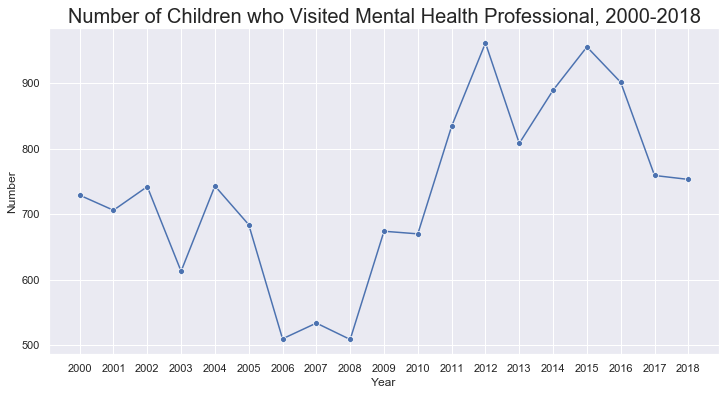

In [9]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1_yes", marker = "o", data=child_summary)
plt.title("Number of Children who Visited Mental Health Professional, 2000-2018", fontdict={'fontsize':20})
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Number");

# summary of highest and lowest number of children visited
max_child = child_summary[["CHCSYR1_yes"]].idxmax()
min_child = child_summary[["CHCSYR1_yes"]].idxmin()
print("The highest number of children attendees is " + str(int(child_summary.loc[max_child, "CHCSYR1_yes"]))
      + " from " + str(int(child_summary.loc[max_child, "SRVY_YR"]))
      + " while the lowest number is " + str(int(child_summary.loc[min_child, "CHCSYR1_yes"]))
      + " from " + str(int(child_summary.loc[min_child, "SRVY_YR"])) + ".")

It seems that the number of users peaked at 2012, but then dropped at 2013, rose again at 2014, and led with a slow drop up to 2018. It seems that not many children were using mental health care during 2006-2008 compared to the other years. The rest of the years seemed to be at average.

However, this plot itself does not suffice and is not an accurate representation of the survey results as a whole. Let's look at another graph, only this time basing on the percentage.

The highest percentage is 9.1063% from 2018 while the lowest percentage is 5.0045% from 2003.


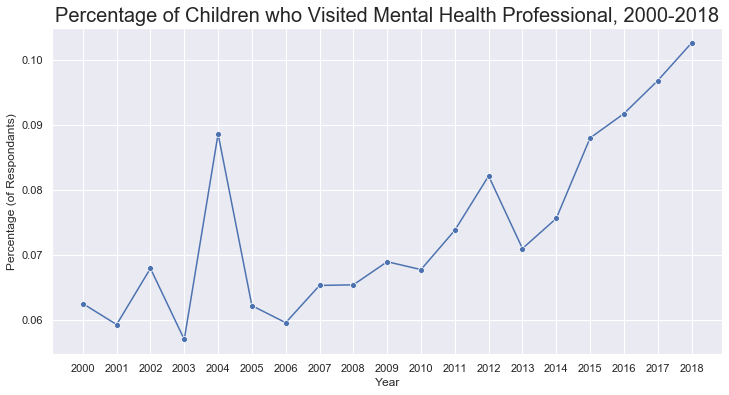

In [10]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", marker = "o", data=big_child, ci=None)
plt.title("Percentage of Children who Visited Mental Health Professional, 2000-2018", fontdict={'fontsize':20})
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)");

# summary of highest and lowest percentage of children throughout survey
high_percent = round((child_summary["CHCSYR1_yes"]/child_summary["total"]).max() * 100, 4)
high_percent_index = (child_summary["CHCSYR1_yes"]/child_summary["total"]).idxmax()
low_percent = round((child_summary["CHCSYR1_yes"]/child_summary["total"]).min() * 100, 4)
low_percent_index = (child_summary["CHCSYR1_yes"]/child_summary["total"]).idxmin()
print("The highest percentage is " + str(high_percent)
      + "% from " + str(int(child_summary.loc[high_percent_index, "SRVY_YR"]))
      + " while the lowest percentage is " + str(low_percent)
      + "% from " + str(int(child_summary.loc[low_percent_index, "SRVY_YR"])) + ".")

This is really interesting! According to the numbers, the amount of children using mental health care leading up to 2018 were depleting, but looking at the percentage, that's not the case! Although there are a few bumps in the earlier 2000 decade, we can make out a gradual increase!

However, we shouldn't be hasteful with our graph. Taking a closer look at the y-axis, the percentage range is rather small, and only ~9.1% of respondents in 2018 had mental health care, which is not an overwhelming amount.

### SEX

Now that I've gotten your attention, let's look at another visualization, this time comparing the use of mental health care among children based on their sex.

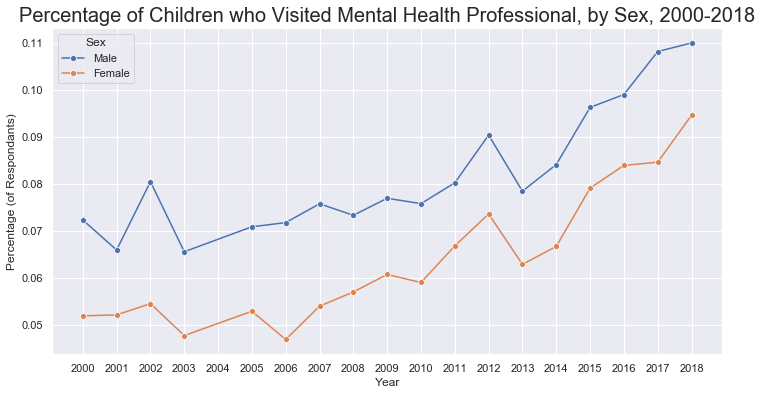

In [11]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="SEX", marker="o", data=big_child, legend=False, ci=None)
plt.title("Percentage of Children who Visited Mental Health Professional, by Sex, 2000-2018", fontdict={'fontsize':20})
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)")
plt.legend(title="Sex", labels=["Male", "Female"]);

It seems that there is a percentage increase in both males and females, similar to the general graph from before. Although the percentage difference is not anything dramatic, notice how more male children are attending mental health care than female children.

Once again, we notice the peak for both sexes to be at 2018, but each sex's lowest ratios were at different times: 2003 and 2006 for male and female, respectively.

### RACERPI2 & HISPAN_I

We'll be plotting two different graphs, one that illustrates the different percentage of children who used mental health care by race, and one that looks solely upon Hispanic/Latino children.

(Note: in the first graph, 'AIAN' stands for 'American Indian or Alaska Native')

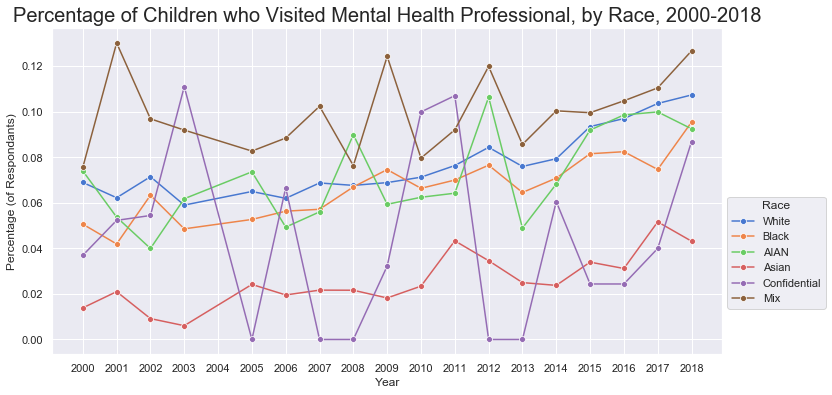

In [12]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="RACERPI2", marker='o', palette=sns.color_palette("muted", n_colors=6),
             legend=False, data=big_child, ci=None)
plt.title("Percentage of Children who Visited Mental Health Professional, by Race, 2000-2018", fontdict={'fontsize':20})
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)")
race_labels = ["White", "Black", "AIAN", "Asian", "Confidential", "Mix"]
plt.legend(title="Race", labels=race_labels, bbox_to_anchor=(1, 0.5))
plt.show();

It seems that a majority of children of mixed race tend to use mental health care (indicated in brown). However, this information should be taken cautiously, as a majority of the years have a small number of respondents' children who are mixed. The same logic can be treated for the American Indians & Alaska Native and respondents who kept their race confidential.

All aside, it seems that white children have a higher percentage of opting in mental health care, closely followed by black children. What struck me about this plot is that it illustrates Asian children the least likeliest to visit a mental health professional, barely peeking at 5% in 2017.

Throughout all race and ethnicities, however, there has been a gradual increase of those utilizing mental health care, reflecting on the general increase as seen from our graph in the **CHCSYR1** section.

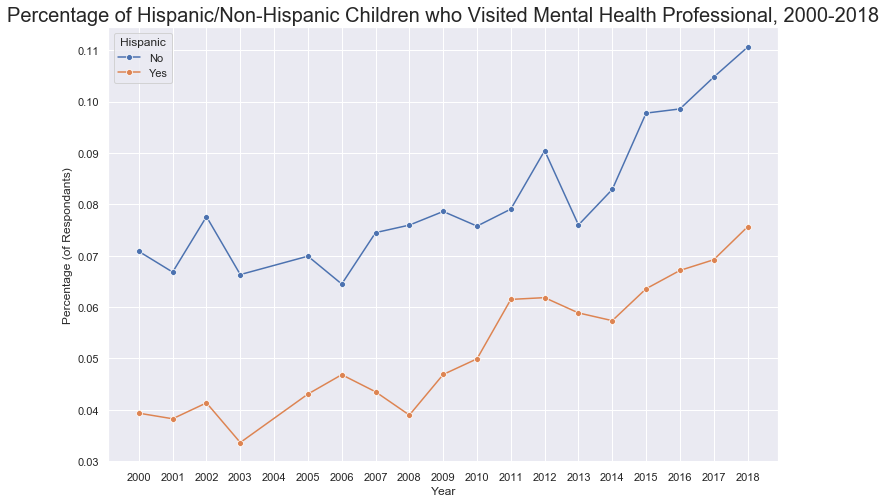

In [13]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="HISPAN_I", marker='o', legend=False, data=big_child, ci=None)
plt.title("Percentage of Hispanic/Non-Hispanic Children who Visited Mental Health Professional, 2000-2018", fontdict={'fontsize':20})
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)");
plt.legend(title="Hispanic", labels=["No", "Yes"]);

Now, looking solely at children of Hispanic/Latino ethnicity (and comparing it to non-Hispanic/Latinos), similar to Asian children, although there has been an increase of Hispanic/Latino children using mental health care, there is not a dramatic percentage opting in, peaking at only around 7.6% on 2018.

### AGE_P

Age is not just a number! Let's go ahead and look into the ratio of mental health care usage by age.

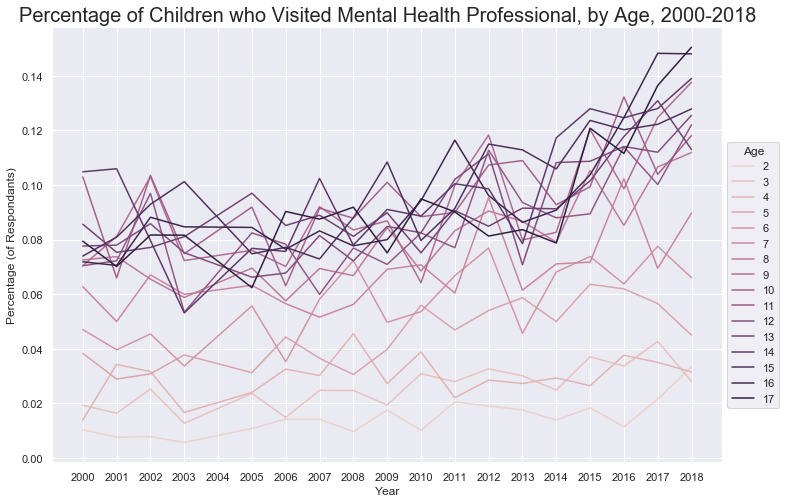

In [14]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="AGE_P", #palette=sns.color_palette("muted", n_colors=16),
             legend=False, data=big_child, ci=None)
plt.title("Percentage of Children who Visited Mental Health Professional, by Age, 2000-2018", fontdict={'fontsize':20})
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)")
plt.legend(title="Age", labels=["2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17"],
           bbox_to_anchor=(1, 0.75));

As we go further up the age spectrum, we notice more users of mental health care from teenagers and children-approaching-young-adulthood, with children of 17 years having the highest ratio at 2018. An interesting observation that can be made about this graph is that even toddlers and preschoolers (age 5 and below) have received mental care. Granted, it's not as high of a percentage compared to other age groups, but I personally did not expect this.

In regards to any trends, we can see the age groups of school-age children (6-12 yrs) and adolescents (13-17 yrs) increase over time, and toddlers/preschoolers remained rather consisten throughout the years.

### CHCAFYR2

An important, direct factor that affects the children's chance to use mental health care is finance. If a family finds it difficult to cover the costs of a therapy or psychiatric session, it is likely that the child may not receive mental health care. Let's go ahead and take a closer look.

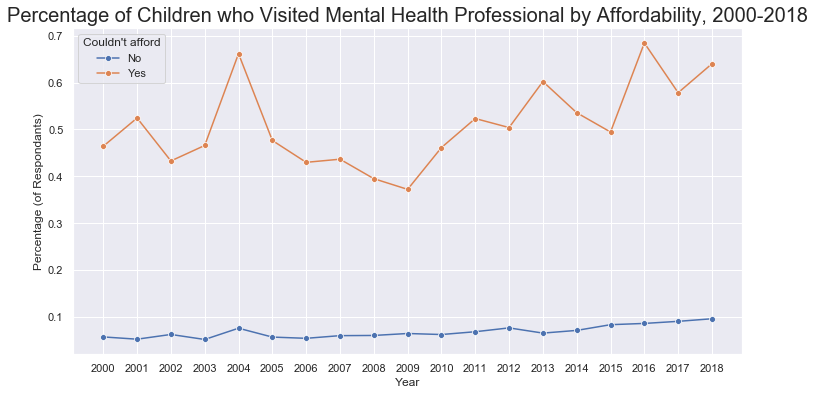

In [15]:
# the following 2 lines handle taking out responses that are ambiguous & not 'yes' or 'no'
dont_know_afford_mental = big_child[(big_child["CHCAFYR2"] != 0) & (big_child["CHCAFYR2"] != 1)].index
big_child_afford_mental = big_child.drop(dont_know_afford_mental)

plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="CHCAFYR2", marker='o', data=big_child_afford_mental, legend=False, ci=None)
plt.title("Percentage of Children who Visited Mental Health Professional by Affordability, 2000-2018", fontdict={'fontsize':20})
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)")
plt.legend(title="Couldn't afford", labels=['No', 'Yes']);

Surprisingly, there were a lot of those who couldn't cover the costs of mental care/counseling but still visited a mental health professional. What could be taken away from this observation is that it illustrates the critical need for children to receive mental care/counseling regardless of the costs, or that children may have visited a mental health professional but was not able to continue going due to financial limitations.

The line plot representing respondents who indicated that they could afford mental care/counseling resembles similar to the percentage graph in **CHCSYR1**, only shown thinner thanks to the high percentage of those who couldn't afford.

### CMDLONGR

Last (but not least), stemming not too far from **CHCAFYR2**, we will look at the different percentage of children who did receive mental care/counseling based on the length of their last visit to their general doctor or a health professional.

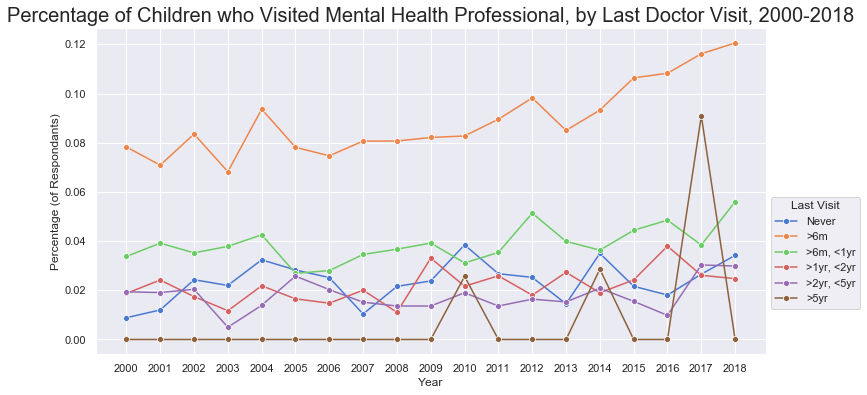

In [16]:
# the following 2 lines handle taking out responses that say "Refused", "Not ascertained", or "Don't know"
dont_know_visit_mental = big_child[(big_child["CMDLONGR"] == 7) | (big_child["CMDLONGR"] == 8) | (big_child["CMDLONGR"] == 9)].index
big_child_visit_mental = big_child.drop(dont_know_visit_mental)

plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="CMDLONGR", marker='o', palette=sns.color_palette("muted", n_colors=6),
             data=big_child_visit_mental, ci=None)
plt.title("Percentage of Children who Visited Mental Health Professional, by Last Doctor Visit, 2000-2018", fontdict={'fontsize':20})
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)")
plt.legend(title='Last Visit', labels=['Never', '>6m', '>6m, <1yr', '>1yr, <2yr', '>2yr, <5yr', '>5yr'], bbox_to_anchor=(1, 0.5));

As expected, children who frequently met up with their doctor were more likelier to receive mental health care. The average percentage based on each visitation group ranks accordingly (with those who had a doctor's visit greater than 6 months ago but less than a year ago ranked second before those who visited less than 6 months ago, etc.), except for those who never visited a health professional. Either this is an inaccurate survey report where respondents may have considered a mental health care specialist separate from a health professional, or that children who never visited a hospital still received mental counseling.

## Conclusion/Discussion

### Some take-home points

<ul>
    <li>There has been an increase percentage of children receiving mental care/counseling over time, showing that mental health has become prominent throughout the years</li>
    <li>Contrary to the stigma about males expressing emotion as a sign of weakness, more male children are receiving care</li>
    <li>The visualization results shown in **RACERPI2 & HISPAN_I** could be due to a variety of reasons. The subculture of each respective race/ethnicity may undermine the value of mental health or view looking for help as "shameful"</li>
    <li>The fact that more adolescents are looking for mental health care confirms the fact that depression and other mental disorders are becoming more prevalent within youth-hood. In addition, one can start looking for mental care/counseling earlier</li>
    <li>Results from **CHCAFYR2** and **CMDLONGR** show the critical need for mental care/counseling, regardless of financial coverage or attendace of doctor visits (or that the survey could have taken better results)</li>
</ul>
    
### Things to consider
<ul>
    <li>All data is from survey results, so observations made throughout this project may not be accurate in describing the general population</li>
    <ul>
        <li>Most respondents were the childrens' parents/guardians</li>
        <li>Potential false/inaccurate inputs</li>
        <li>Survey population was small</li>
    </ul>
</ul>
    
### Possible future research
<ul>
    <li>Exploration of other survey questions</li>
    <ul>
        <li>MHIBOY2/MHIGRL2: Mental Health Indicator (boy and girl)</li>
        <li>CMHAGM25: Unhappy, sad, or depressed past 6 mon</li>
        <li>NTRSAYR: Didn't get treatment or counseling because afraid of family/friends opinion</li>
    </ul>
    <li>Overlapping the questions observed throughout this project (eg. looking at percentage of children who visited mental health professional by age AND race, etc.)</li>
    <li>Expansion of project with machine learning, such as PCA or predicting future points</li>
    <li>Grouping children with and without mental disorder</li>
    <li>Request to have important questions from one year be asked in other years</li>
</ul>